# **Vizualizing and Analyzing Dataset**

### **Reading the Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import os
os.chdir("/content/drive/My Drive/ibm project")

In [2]:
data = pd.read_csv('LoanApprovalPrediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(598, 13)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


### **Univariate Analysis**

In [5]:
# Loan ID
data['Loan_ID'].duplicated().count()

598

In [6]:
# Gender
data['Gender'].value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

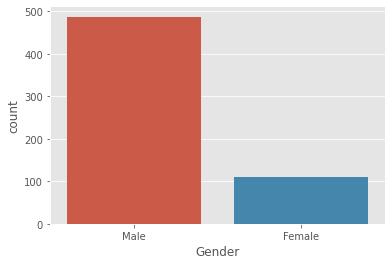

In [7]:
sns.countplot(x='Gender', data=data)
plt.show()

In [8]:
# Married
data['Married'].value_counts()

Yes    388
No     210
Name: Married, dtype: int64

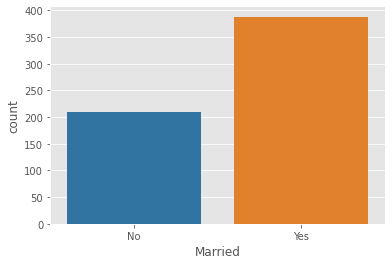

In [9]:
sns.countplot(x='Married', data=data, palette='tab10')
plt.show()

In [10]:
# Education
data['Education'].value_counts()

Graduate        465
Not Graduate    133
Name: Education, dtype: int64

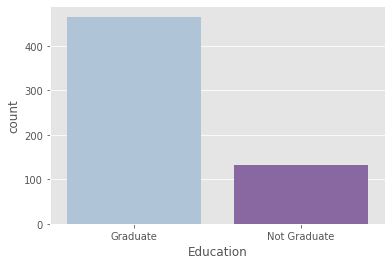

In [11]:
sns.countplot(x='Education', data=data, palette='BuPu')
plt.show()

In [12]:
# Self Employed
data['Self_Employed'].value_counts()

No     488
Yes    110
Name: Self_Employed, dtype: int64

In [13]:
# Property Area
data['Property_Area'].value_counts()

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64

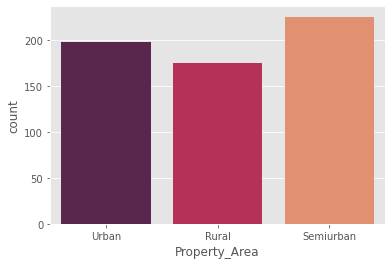

In [14]:
sns.countplot(x='Property_Area', data=data, palette='rocket')
plt.show()

In [15]:
# Loan_Status
data.Loan_Status.value_counts()

Y    411
N    187
Name: Loan_Status, dtype: int64

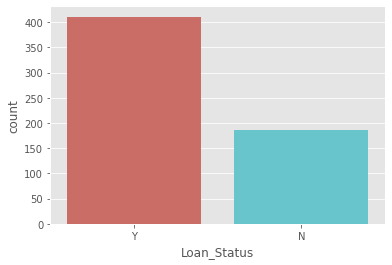

In [16]:
sns.countplot(x='Loan_Status', data=data, palette='hls')
plt.show()

In [17]:
# Loan_Amount_Term
data.Loan_Amount_Term.value_counts(dropna=False)

360.0    500
180.0     43
NaN       14
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

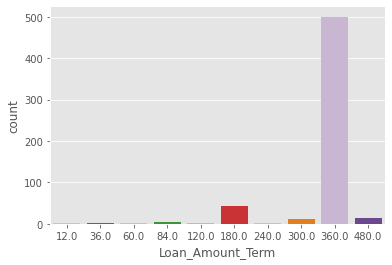

In [18]:
sns.countplot(x='Loan_Amount_Term', data=data, palette='Paired')
plt.show()

### **Distribution of Numerical Variable**

In [19]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


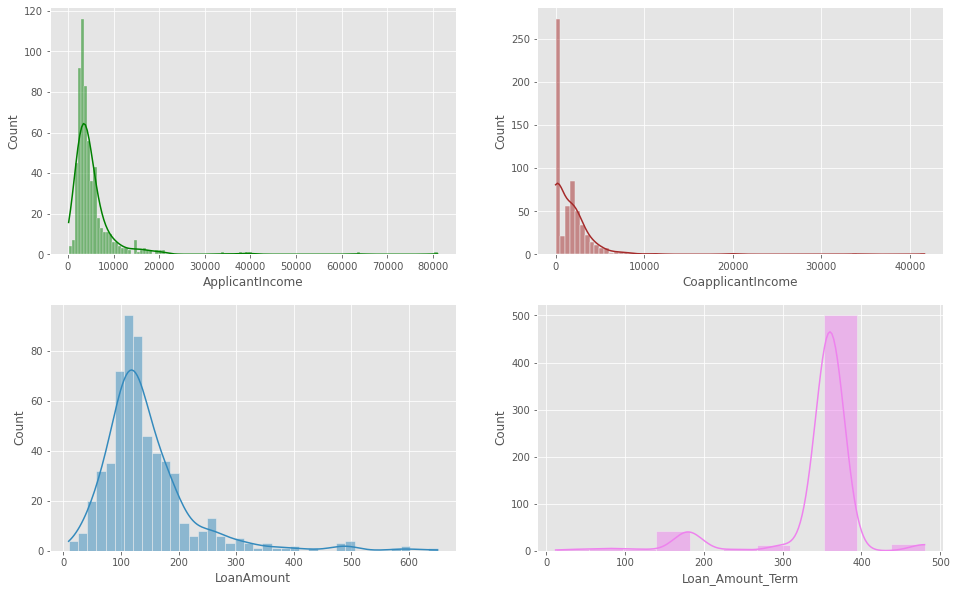

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))

sns.histplot(data=data, x='ApplicantIncome', kde=True, ax=axs[0,0], color='green')
sns.histplot(data=data, x='CoapplicantIncome', kde=True, ax=axs[0,1], color='brown')
sns.histplot(data=data, x='LoanAmount', kde=True, ax=axs[1,0])
sns.histplot(data=data, x='Loan_Amount_Term', kde=True, ax=axs[1,1], color='violet')

### **Bivariate Analysis**

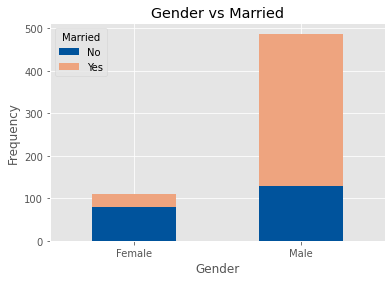

In [21]:
pd.crosstab(data.Gender, data.Married).plot(kind='bar', stacked=True, color=['#00539CFF', '#EEA47FFF'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Gender vs Married')
plt.show()

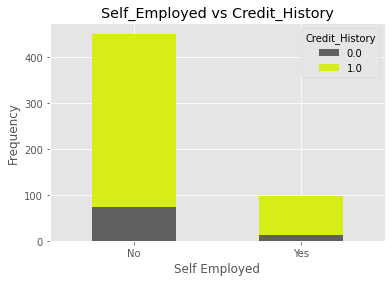

In [22]:
pd.crosstab(data.Self_Employed, data.Credit_History).plot(kind='bar', stacked=True, color=['#606060FF','#D6ED17FF'])

plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Self_Employed vs Credit_History')
plt.show()

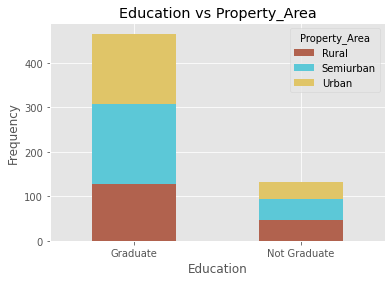

In [23]:
pd.crosstab(data.Education, data.Property_Area).plot(kind='bar', stacked=True, color=['#B1624EFF','#5CC8D7FF','#E0C568FF'])
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Education vs Property_Area')
plt.show()

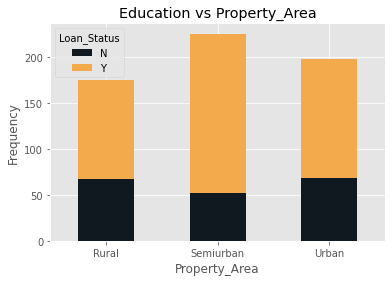

In [24]:
pd.crosstab(data.Property_Area, data.Loan_Status).plot(kind='bar', stacked=True, color=['#101820FF','#F2AA4CFF'])
plt.xlabel('Property_Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Education vs Property_Area')
plt.show()

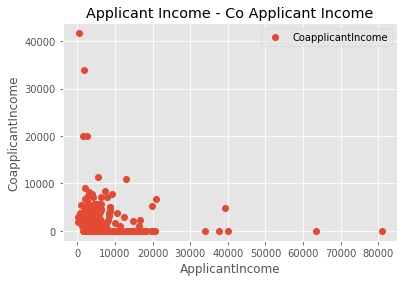

In [25]:
data.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

### **Multivariate Analysis**

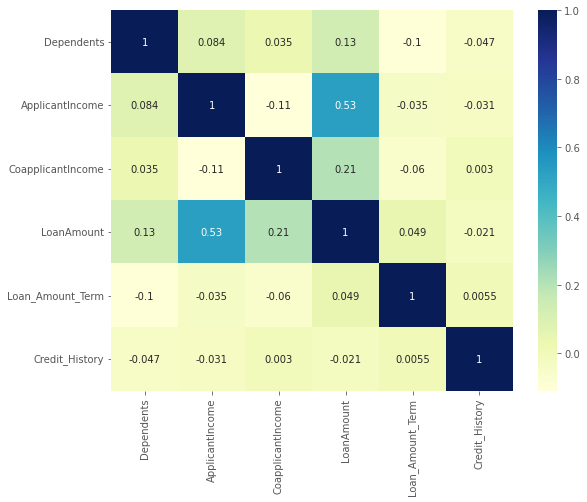

In [26]:
fig, ax = plt.subplots(figsize=(9, 7))
correlations = data.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()